## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from scipy import stats
from plotly import express as px
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

today = dt.datetime.today()

## Importing the Tables

In [2]:
df = pd.read_excel('./Files/spread.xlsx', 
                   sheet_name= 'individual',
                   index_col=0).drop([9, 'purchase_price', 'sale_price', 'purchase_date'], axis=1)

df_month = pd.read_excel('./Files/spread.xlsx', 
                         sheet_name= '2021',
                         index_col=0)

In [3]:
# sorting catagorical values

cat_cols = ['breed']
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,cat_cols] = df.loc[:,cat_cols].apply(enc.fit_transform)

df

,birth_date,slaughter_date,slaughter_weight,slaughter_age,breed,meds,feed_eaten,sex
ID,,,,,,,,
1,2020-11-06,2021-03-14,53.75,128.0,1,1.0,115.0,0
2,2021-02-20,2021-06-27,54.00,127.0,0,1.0,110.0,1
3,2021-02-20,2021-07-17,56.00,149.0,0,3.0,110.0,1
4,2021-05-07,2021-08-31,58.00,114.0,2,0.0,108.0,1
5,2021-05-07,2021-09-06,59.00,122.0,2,0.0,108.0,1
6,2021-06-21,2021-10-02,39.00,105.0,1,1.0,62.5,0
7,2021-06-21,2021-10-06,40.00,110.0,1,1.0,62.5,1
8,2021-06-21,NaT,NaN,NaN,1,1.0,62.5,1
9,2021-06-21,NaT,NaN,NaN,1,4.0,62.5,1


In [4]:
df_alive = df.loc[df.slaughter_date.isnull()==True]
df_alive = df_alive.drop(['slaughter_date', 'slaughter_weight', 'slaughter_age'], axis=1)
#df_alive['slaughter_estimate'] = df.birth_date + dt.timedelta(days=99) 

df_alive

,birth_date,breed,meds,feed_eaten,sex
ID,,,,,
8,2021-06-21,1,1.0,62.5,1
9,2021-06-21,1,4.0,62.5,1


In [5]:
df_slaughtered = df.loc[df.slaughter_date.isnull()==False]

df_slaughtered

,birth_date,slaughter_date,slaughter_weight,slaughter_age,breed,meds,feed_eaten,sex
ID,,,,,,,,
1,2020-11-06,2021-03-14,53.75,128.0,1,1.0,115.0,0
2,2021-02-20,2021-06-27,54.00,127.0,0,1.0,110.0,1
3,2021-02-20,2021-07-17,56.00,149.0,0,3.0,110.0,1
4,2021-05-07,2021-08-31,58.00,114.0,2,0.0,108.0,1
5,2021-05-07,2021-09-06,59.00,122.0,2,0.0,108.0,1
6,2021-06-21,2021-10-02,39.00,105.0,1,1.0,62.5,0
7,2021-06-21,2021-10-06,40.00,110.0,1,1.0,62.5,1


# Visualization

## Mass - age graph

Text(0.5, 1.0, 'Mass-Age Graph')

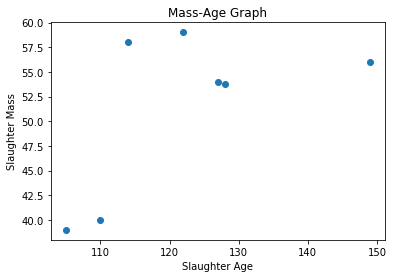

In [6]:
""" px.scatter(x=df_slaughtered.slaughter_age,
        y=df_slaughtered.slaughter_weight,
        title='Mass Against Age',
        labels={'x':'Age(days)', 'y':'Mass(Kg)'}
        ) """

""" df_slaughtered.plot(kind= 'scatter',
        x= 'slaughter_age',
        y= 'slaughter_weight') """

plt.scatter(x=df_slaughtered.slaughter_age,
        y=df_slaughtered.slaughter_weight,
        )
plt.xlabel("Slaughter Age")
plt.ylabel("Slaughter Mass")
plt.title("Mass-Age Graph")

## correlation and them


In [7]:
# correlation of age and mass

np.cov(df_slaughtered.slaughter_age, df_slaughtered.slaughter_weight)[0,1] / (np.std(df.slaughter_weight[:3], ddof=1) * np.std(df.slaughter_age[:3], ddof=1))


4.853077727776141

In [8]:
# easier way

r, p = stats.pearsonr(
    df_slaughtered.slaughter_age[:3],
    df_slaughtered.slaughter_weight[:3]
)
corr = df_slaughtered.corr()
r # Pearson correlation coefficient

0.9899641382093992

Text(0.5, 1, 'Correlation Plot')

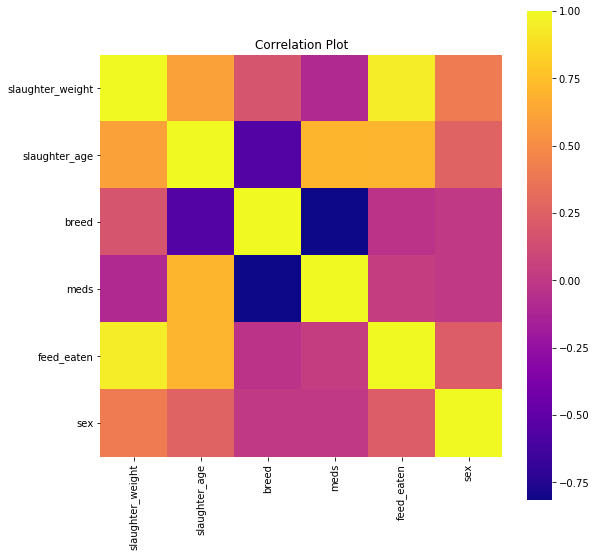

In [9]:
plt.figure(figsize=(9,9))
p = sns.heatmap(corr, square=True, cmap='plasma')
p.set_title('Correlation Plot')

## Line of best fit (regression)

/home/bayanda/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


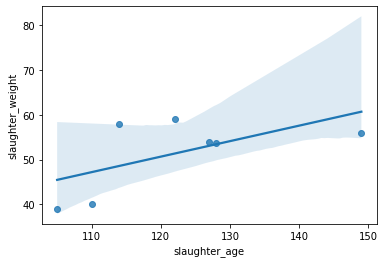

In [10]:
plt = sns.regplot(df_slaughtered.slaughter_age,df_slaughtered.slaughter_weight)

# Models

In [11]:
df_alive['slaughter_weight'] = 52

## scaling

In [12]:
# scaling

scaled_features = ['slaughter_weight','meds','slaughter_weight']

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df[scaled_features] = scale.fit_transform(df[scaled_features])

df

,birth_date,slaughter_date,slaughter_weight,slaughter_age,breed,meds,feed_eaten,sex
ID,,,,,,,,
1,2020-11-06,2021-03-14,0.304857,128.0,1,-0.267261,115.0,0
2,2021-02-20,2021-06-27,0.337191,127.0,0,-0.267261,110.0,1
3,2021-02-20,2021-07-17,0.595857,149.0,0,1.336306,110.0,1
4,2021-05-07,2021-08-31,0.854524,114.0,2,-1.069045,108.0,1
5,2021-05-07,2021-09-06,0.983857,122.0,2,-1.069045,108.0,1
6,2021-06-21,2021-10-02,-1.602810,105.0,1,-0.267261,62.5,0
7,2021-06-21,2021-10-06,-1.473476,110.0,1,-0.267261,62.5,1
8,2021-06-21,NaT,NaN,NaN,1,-0.267261,62.5,1
9,2021-06-21,NaT,NaN,NaN,1,2.138090,62.5,1


## decision tree model

In [13]:
from sklearn.tree import DecisionTreeRegressor


# Our target
y = df_slaughtered.slaughter_age

# Our features
features = ['slaughter_weight', 'meds', 'breed', 'sex', 'feed_eaten'] #
X = df_slaughtered[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [14]:
# calling model
age_model = DecisionTreeRegressor(random_state=1)

# fitting data into model
age_model.fit(train_X,train_y)

DecisionTreeRegressor(random_state=1)

In [15]:
# prediction

age_prediction = age_model.predict(val_X)

print('prediction:\n', age_prediction)

print('real:\n',val_y)

prediction:
 [105. 127.]
real:
 ID
7    110.0
3    149.0
Name: slaughter_age, dtype: float64


In [16]:
age_model.predict(df_alive[features])

array([127., 127.])

## XGBoost

In [17]:
from xgboost import XGBRegressor

xg_model = XGBRegressor(random_state=1, max_depth=3)
xg_model.fit(train_X, train_y)

xg_age_prediction = xg_model.predict(val_X)


print('prediction:\n', xg_age_prediction)

print('real:\n',val_y)

xg_model.predict(df_alive[features]).round(0)

prediction:
 [105.000305 126.232254]
real:
 ID
7    110.0
3    149.0
Name: slaughter_age, dtype: float64


array([115., 115.], dtype=float32)

# Average Age

In [18]:
df_alive

,birth_date,breed,meds,feed_eaten,sex,slaughter_weight
ID,,,,,,
8,2021-06-21,1,1.0,62.5,1,52
9,2021-06-21,1,4.0,62.5,1,52


In [19]:
from calendar import monthrange

In [20]:
just = dt.date.today()

day = monthrange(2021, just.month)[1]//2

mid_month = just - dt.timedelta(days=just.day + day)

mid_month

datetime.date(2021, 9, 15)

In [21]:
df_alive['age'] = dt.datetime.fromordinal(just.toordinal()) - pd.to_datetime(df.birth_date)
df_alive['mid_month_age'] = dt.datetime.fromordinal(mid_month.toordinal()) - pd.to_datetime(df.birth_date)

avAge = df_alive.mid_month_age.mean()

df_alive

,birth_date,breed,meds,feed_eaten,sex,slaughter_weight,age,mid_month_age
ID,,,,,,,,
8,2021-06-21,1,1.0,62.5,1,52,122 days,86 days
9,2021-06-21,1,4.0,62.5,1,52,122 days,86 days


# Feed over lifetime

In [22]:
df_alive

,birth_date,breed,meds,feed_eaten,sex,slaughter_weight,age,mid_month_age
ID,,,,,,,,
8,2021-06-21,1,1.0,62.5,1,52,122 days,86 days
9,2021-06-21,1,4.0,62.5,1,52,122 days,86 days


Getting the months the pig was bought and slaughtered

In [23]:
month_bought = pd.to_datetime(df.loc[6]['birth_date']).month
month_slaughtered = just.month

month_bought, month_slaughtered

(6, 10)

If the piglet was bought after the 15th of the month, don't count it's feed for that month

In [24]:
if pd.to_datetime(df.loc[6]['birth_date']).day > 15:
    month_bought += 1

month_bought

7

In [25]:
df_month

,population,feed_mass,feed_price,feed_per_pig,average_age
month,,,,,
jan,0,0,0,0.0,0
feb,0,0,0,0.0,0
mar,0,0,0,0.0,0
apr,0,0,0,0.0,0
may,3,150,960,50.0,96
jun,3,100,624,33.0,77
jul,6,200,1292,33.0,71
aug,6,250,1606,42.0,71
sep,4,250,1575,62.5,56


Feed per pig

In [26]:
df_month['feed_per_pig'] = df_month.feed_mass / df_month.population

df_month

,population,feed_mass,feed_price,feed_per_pig,average_age
month,,,,,
jan,0,0,0,NaN,0
feb,0,0,0,NaN,0
mar,0,0,0,NaN,0
apr,0,0,0,NaN,0
may,3,150,960,50.000000,96
jun,3,100,624,33.333333,77
jul,6,200,1292,33.333333,71
aug,6,250,1606,41.666667,71
sep,4,250,1575,62.500000,56


In [27]:
df_month[4: 7]['feed_per_pig'].sum()

116.66666666666669

In [28]:
dt.datetime.now().month  


10